Problem Statement:

Output variable -> y

y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
#Libraries imported
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [2]:
# Load the data while specifying the delimiter
df = pd.read_csv('bank-full.csv', delimiter=';')

In [3]:
# Display the top few rows of the DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Display the bottom few rows of the DataFrame
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Inference drawn from df.info()

 - The dataset contains 45,211 entries and 17 columns.
 - The data types in the dataset are integers (int64) for 7 columns and objects (categorical or text) for 10 columns.
 - There are no missing values; all columns have complete data.
 - Multiple columns represent categorical information, while others contain numerical data.

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Inference drawn from df.describe()

 - The average client age is approximately 40.94 years.
 - The average annual balance is about 1362.27 euros.
 - Most contact days fall around the middle of the month.
 - Call durations vary widely, with an average of 258.16 seconds.
 - Clients were contacted about 2.76 times on average during the campaign.
 - Many clients were not previously contacted or the outcome was not recorded.

In [7]:
#Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Display the NaN counts for each column
print(nan_counts) # No Null values found

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows) # No duplicate rows found

Duplicate Rows:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [9]:
# Loop through the categorical columns and check unique values
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values) # No Typos or Inaccuracies found

Unique values in column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in column 'marital':
['married' 'single' 'divorced']
Unique values in column 'education':
['tertiary' 'secondary' 'unknown' 'primary']
Unique values in column 'default':
['no' 'yes']
Unique values in column 'housing':
['yes' 'no']
Unique values in column 'loan':
['no' 'yes']
Unique values in column 'contact':
['unknown' 'cellular' 'telephone']
Unique values in column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column 'poutcome':
['unknown' 'failure' 'other' 'success']
Unique values in column 'y':
['no' 'yes']


In [10]:
# Specify the numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define a function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in each numerical column
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    if not outliers.empty:
        print(f"Outliers in '{column}':")
        print(outliers)

Outliers in 'age':
       age      job   marital  education default  balance housing loan  \
29158   83  retired   married    primary      no      425      no   no   
29261   75  retired  divorced    primary      no       46      no   no   
29263   75  retired   married    primary      no     3324      no   no   
29322   83  retired   married   tertiary      no     6236      no   no   
29865   75  retired  divorced    primary      no     3881     yes   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
45163   71  retired   married  secondary      no     2064      no   no   
45191   75  retired  divorced   tertiary      no     3810     yes   no   
45204   73  retired   married  secondary      no     2850      no   no   
45207   71  retired  divorced    primary      no     1729      no   no   
45208   72  retired   married  secondary      no     5715      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
29158  tele

In [11]:
# Specify the numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define a function to calculate the percentage of outliers
def calculate_outlier_percentage(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    total_count = len(df)
    outliers = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    percentage = (outliers / total_count) * 100
    return percentage

# Calculate and print the percentage of outliers in each numerical column
for column in numerical_columns:
    outlier_percentage = calculate_outlier_percentage(df, column)
    print(f"Percentage of outliers in '{column}': {outlier_percentage:.2f}%")


Percentage of outliers in 'age': 1.08%
Percentage of outliers in 'balance': 10.46%
Percentage of outliers in 'day': 0.00%
Percentage of outliers in 'duration': 7.16%
Percentage of outliers in 'campaign': 6.78%
Percentage of outliers in 'pdays': 18.26%
Percentage of outliers in 'previous': 18.26%


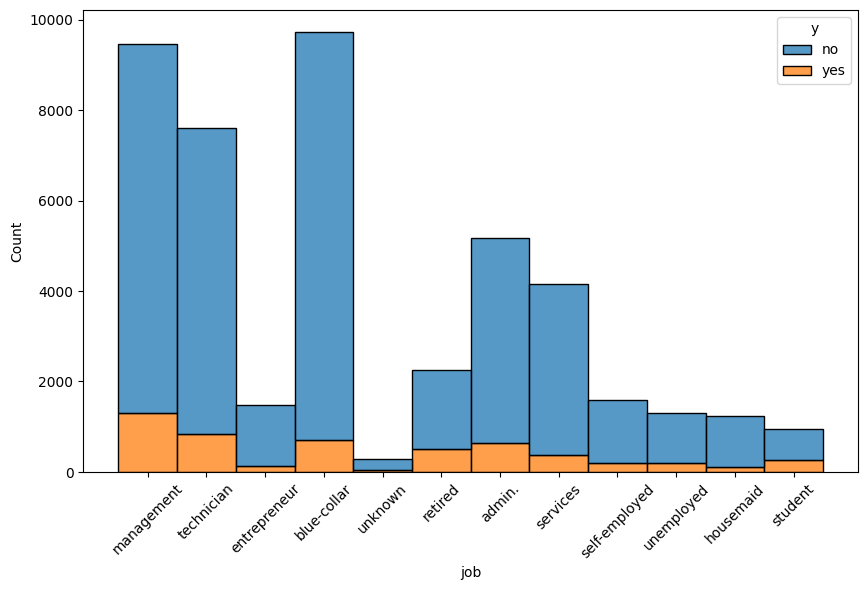

In [12]:
# Histogram of 'job' vs. 'y'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='job', hue='y', multiple='stack')
plt.xticks(rotation=45)
plt.show()

Inference drawn from the above Histogram is that, the majority of customers do not have term plain.

In [13]:
# Selecting categorical columns suitable for one-hot encoding
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply one-hot encoding to the categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

In [14]:
# Configure Jupyter Notebook to display all columns
pd.set_option('display.max_columns', None)

df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,no,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,44,no,29,yes,no,5,151,1,-1,0,no,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,33,no,2,yes,yes,5,76,1,-1,0,no,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,47,no,1506,yes,no,5,92,1,-1,0,no,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,33,no,1,no,no,5,198,1,-1,0,no,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  bool  
 12  job_blue-collar      45211 non-null  bool  
 13  job_entrepreneur     45211 non-null  bool  
 14  job_housemaid        45211 non-null  bool  
 15  job_management       45211 non-null  bool  
 16  job_

In [16]:
# Convert object columns to integers
df['default'] = (df['default'] == 'yes').astype(int)
df['y'] = (df['y'] == 'yes').astype(int)
df['housing'] = (df['housing'] == 'yes').astype(int)
df['loan'] = (df['loan'] == 'yes').astype(int)

In [17]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [18]:
# Convert boolean columns to integers
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [19]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [20]:
# Split the data into features (X) and the target (y)
X = df.drop('y',axis=1).values
y = df['y'].values

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize the logistic regression model
model = LogisticRegression()

In [23]:
# Fit the model on the training data
model.fit(X_train, y_train)

C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Predict on the test data
y_pred = model.predict(X_test)

In [25]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [26]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.63      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.61      9043
weighted avg       0.87      0.89      0.86      9043



Inference drawn from classification report: The model has good performance, with an accuracy of 89% and a weighted average F1-score of 0.86.

In [27]:
# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[7835  117]
 [ 888  203]]


Inference Drawn: The above confusion matrix shows that the model is making a lot of correct predictions, but it is also making some false positive and false negative predictions.

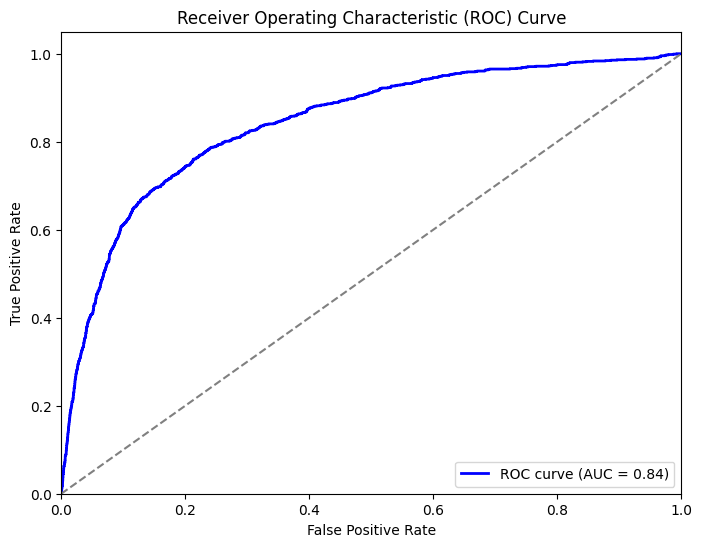

AUC: 0.84


In [28]:
# Get predicted probabilities for class 1 (subscribed)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC value
print(f'AUC: {auc:.2f}')


Inference drawn: AUC (Area Under the Curve) value of 0.84 indicates that the logistic regression model is effective at distinguishing between clients who subscribe and those who do not.